# Distribution of SEC filings
<ul>
    <li> 10-K: annual report
    <li> 10-Q: quarterly report
    <li> 8-K: current report
    <li> S-4: filing for material information related to M&A
    <li> S-1: registration statement
    <li> S-3: registration statement
    <li> F-1: registration statement by foreign firms
    <li> F-3: registration statement by foreign firms
    <li> 424BX: supplementary prospctus
</ul>

Source link: https://www.sec.gov/dera/data/dera_edgarfilingcounts

In [1]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

url_csv= r"https://www.sec.gov/files/dera/data/number-edgar-filings-form-type/filings_type_year_0921.csv"
response= requests.get(url_csv)
content= response.text
df= pd.read_csv(io.StringIO(content), lineterminator='\n')
df = df.pivot(index='Year', columns='Type', values='Count')
df= df.loc[2000:2021]
df.head()

Type,1,1-A,1-A POS,1-A-W,1-A-W/A,1-A/A,1-E,1-E AD,1-E/A,1-K,...,U5B,U5B/A,U5S,U5S/A,UNDER,UNDER/A,UPLOAD,WDL-REQ,X-17A-5,X-17A-5/A
Year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,18.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,3.0,20.0,1.0,7.0,1.0,NaN,NaN,7.0,2.0
2002,6.0,23.0,NaN,NaN,NaN,100.0,5.0,NaN,NaN,NaN,...,5.0,2.0,26.0,12.0,7.0,NaN,NaN,5.0,5538.0,337.0
2003,1.0,34.0,NaN,NaN,NaN,54.0,11.0,NaN,3.0,NaN,...,NaN,2.0,27.0,9.0,4.0,NaN,NaN,8.0,5410.0,284.0
2004,4.0,21.0,NaN,NaN,NaN,67.0,42.0,NaN,12.0,NaN,...,3.0,1.0,29.0,10.0,2.0,NaN,639.0,2.0,5281.0,477.0


## Display all filing types

In [2]:
print(f"Total number of filing types: {len(df.columns)}")
print("---------------------------------------")
for idx, col in enumerate(df.columns):
    print(idx, col)

Total number of filing types: 708
---------------------------------------
0 1
1 1-A
2 1-A POS
3 1-A-W
4 1-A-W/A
5 1-A/A
6 1-E
7 1-E AD
8 1-E/A
9 1-K
10 1-K/A
11 1-SA
12 1-SA/A
13 1-U
14 1-U/A
15 1-Z
16 1-Z-W
17 1-Z/A
18 1/A
19 10-12B
20 10-12B/A
21 10-12G
22 10-12G/A
23 10-C
24 10-C/A
25 10-D
26 10-D/A
27 10-K
28 10-K/A
29 10-K405
30 10-K405/A
31 10-KSB
32 10-KSB/A
33 10-KT
34 10-KT/A
35 10-Q
36 10-Q/A
37 10-QSB
38 10-QSB/A
39 10-QT
40 10-QT/A
41 10KSB
42 10KSB/A
43 10KSB40
44 10KSB40/A
45 10KT405
46 10KT405/A
47 10QSB
48 10QSB/A
49 10SB12B
50 10SB12B/A
51 10SB12G
52 10SB12G/A
53 11-K
54 11-K/A
55 11-KT
56 11-KT/A
57 12G3-2B
58 12G32BR
59 13F-E
60 13F-E/A
61 13F-HR
62 13F-HR/A
63 13F-NT
64 13F-NT/A
65 13FCONP
66 13FCONP/A
67 144
68 144/A
69 15-12B
70 15-12B/A
71 15-12G
72 15-12G/A
73 15-15D
74 15-15D/A
75 15F-12B
76 15F-12B/A
77 15F-12G
78 15F-12G/A
79 15F-15D
80 15F-15D/A
81 18-12B
82 18-K
83 18-K/A
84 19B-4
85 19B-4E
86 2-A
87 2-A/A
88 2-AF
89 2-E
90 2-E/A
91 20-F
92 20-F/A
93 20FR12

## Distribution

### 10-K (annual report) and 10-Q (quarterly report)

In [3]:
figsize=(7,4)

<AxesSubplot:xlabel='Year'>

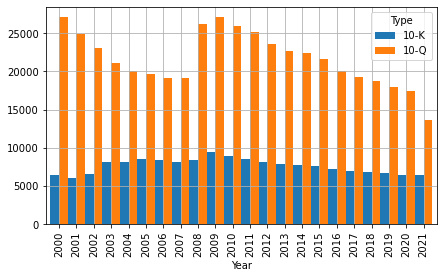

In [4]:
df[['10-K', '10-Q']].plot(kind='bar', figsize= figsize, grid= True, width=1)

### 8-K filings (current reports)

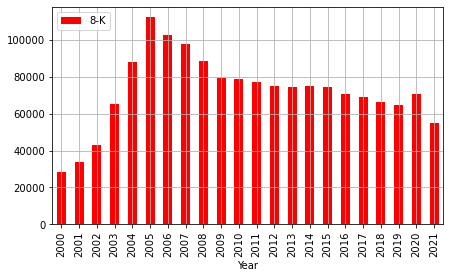

In [5]:
df[['8-K']].plot(kind= 'bar', figsize= figsize, grid=True, color= 'red').legend(loc='upper left')

### S-4 filings (material information related to M&A)

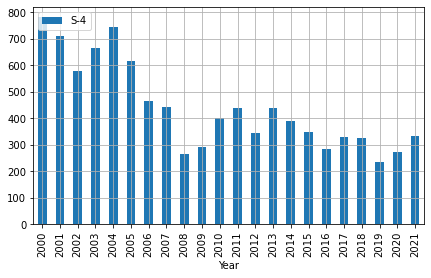

In [6]:
df[['S-4']].plot(kind= 'bar', figsize= figsize, grid=True).legend(loc='upper left')

### S-1 and S-3 filings (registration statements)

<AxesSubplot:xlabel='Year'>

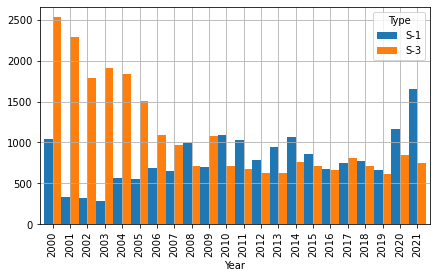

In [7]:
df[['S-1', 'S-3']].plot(kind='bar', figsize= figsize, grid= True, width=1)

### S-8 filings (registration statements)

<AxesSubplot:xlabel='Year'>

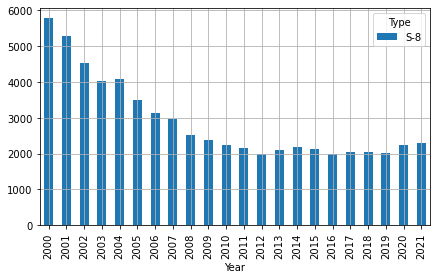

In [8]:
df[['S-8']].plot(kind='bar', figsize= figsize, grid= True)

### F-1 and F-3 filings (registration statements by foreign issuers)

<AxesSubplot:xlabel='Year'>

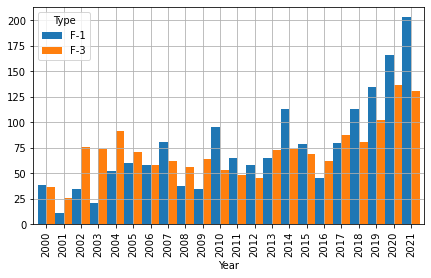

In [9]:
df[['F-1', 'F-3']].plot(kind='bar', figsize= figsize, grid= True, width=1)

### 424BX supplementary prospectus

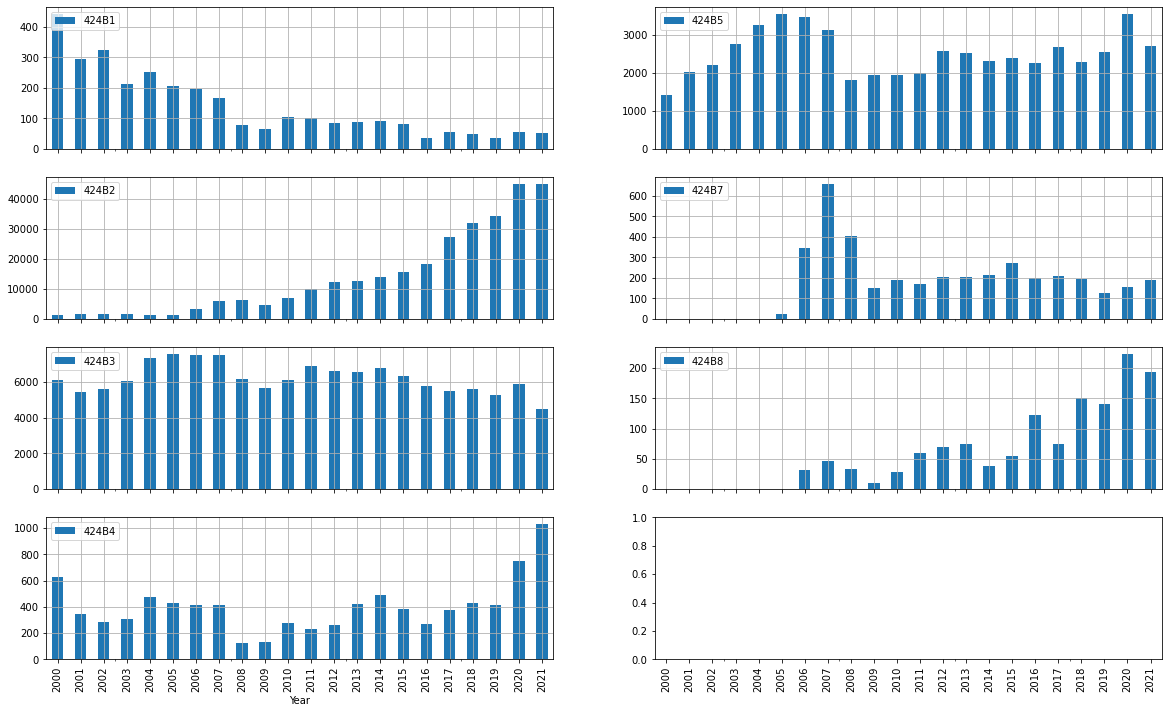

In [10]:
figure, axes= plt.subplots(4,2, sharex=True, figsize= (20,12))
plt.xticks(rotation=90)
df[['424B1']].plot(kind= 'bar', ax= axes[0,0], grid=True).legend(loc='upper left')
df[['424B2']].plot(kind= 'bar', ax= axes[1,0], grid=True).legend(loc='upper left')
df[['424B3']].plot(kind= 'bar', ax= axes[2,0], grid=True).legend(loc='upper left')
df[['424B4']].plot(kind= 'bar', ax= axes[3,0], grid=True).legend(loc='upper left')
df[['424B5']].plot(kind= 'bar', ax= axes[0,1], grid=True).legend(loc='upper left')
df[['424B7']].plot(kind= 'bar', ax= axes[1,1], grid=True).legend(loc='upper left')
df[['424B8']].plot(kind= 'bar', ax= axes[2,1], grid=True).legend(loc='upper left')